In [330]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [331]:
%matplotlib inline

In [332]:
array = []
with open("ex1data2.txt", "r") as f:
  for line in f:
    array.append(line)
    
for i in range(len(array)):
    array[i] = array[i].replace("\n", "")
    
data = np.zeros([len(array) , 3])

for i in range(len(array)):
    temp = array[i].split(',')
    data[i] = temp

In [333]:
feet2 = data[ : , 0 ]
bedrooms = data[ : , 1]
price = data[ : , 2]/1000

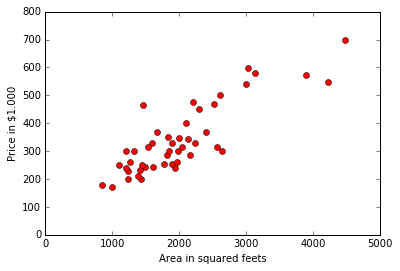

In [334]:
plt.plot(feet2 , price , 'ro')
plt.xlabel('Area in squared feets')
plt.ylabel('Price in $1.000')
plt.axis([0 , 5000 , 0 , 800])
plt.show()

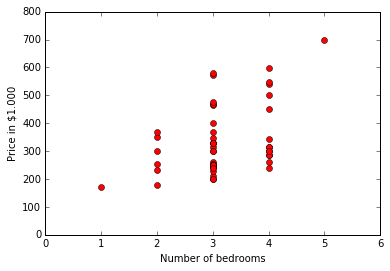

In [335]:
plt.plot(bedrooms , price , 'ro')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price in $1.000')
plt.axis([0 , 6 , 0 , 800])
plt.show()

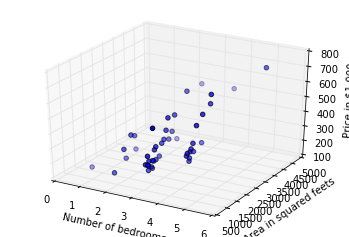

In [336]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Number of bedrooms')
ax.set_ylabel('Area in squared feets')
ax.set_zlabel('Price in $1.000')

ax.scatter(bedrooms , feet2 , price )
plt.show()

In order to simplify our data we will represent the "Area in squared feets" with an array $x_1$ and the "Number of bedrooms" with an array $x_2$ We are going to perform our supervised learning algorithm using the hyothesis function: $$h_{w}(x) = w_{0} + w_{1}x_1 + w_{2}x_2$$

Obviously now we need to implement some method to find the values of $w_i$. We are going to use a gradient descent algorithm now. We will try to simplify our data using a matrix **X** with a column of ones, the second column equals to $x_1$ and the third to $x_2$. Therefore our hypothesis function will become $$h_{w}(x) = w_{0}x_0 + w_{1}x_1 + w_{2}x_2$$ while $x_0$ will always be equal to 1.

In [337]:
t = price
x1 = feet2
x2 = bedrooms
X = np.ones((len(x1) , 3))
X[: , 1] = x1
X[: , 2] = x2

We will now initialize our weights with a random vector of size 3.

In [338]:
W = np.random.rand(3)
print (W)

[ 0.06450309  0.89812423  0.02372023]


Now our hypothesis function can be written as: 
$$h_w(x^{(i)}) = \sum_{j = 0}^{2}w_j x_j^{(i)} = w^{T}x^{(i)}$$

We re going to use the **Ordinary Least Squared (OLS)** regression model so our **Loss Function** will be:
$$L(w) = \frac{1}{2} \sum_{i=1}^N \big( h_w(x^{(i)}) - t^{(i)} \big)^2$$

While we are using the gradient descent algorithm our task is to minimize the Loss Function so we will repeatedly perform the update:
$$w_j := w_j - \alpha \frac{\partial}{\partial w}L(w) $$

We call the value $\alpha$ the **learning rate**. The rule is called the **Least Means Squared** rule **(LMS)**. The idea is to perform an update for the weights **w** until convergence. After some calculations we can write the update rule as:
$$w_j := w_j + \alpha \sum_{i = 1}^N \big( t^{(i)} - h_w(x^{(i)}) \big) x_j^{(i)}$$

This method looks at every example in the entire training set on every step, and is called **batch gradient descent**.

In [339]:
def batch_gradient_descent(X , w , t , a = 7e-10 , iterations = 100000, tolerance = 1):
    converged = False
    weights = np.zeros(len(w))
    
    while iterations > 0 and  not converged:
        iterations -=1
        
        # We compute the predictions  
        H = np.dot(X , w)
        
        
        errors = t - H
        
        for j in range(len(w)):
            derivative = np.dot(errors , X[: , j])
            #weights[j] = w[j] + a*derivative
            w[j] += a*derivative
            
        #w = weights
        
    L = 0.5*(errors**2).sum()
    return (w , L)
    

In [340]:
(weights , Loss) = batch_gradient_descent

[ 0.72159763  0.19381893  0.36469094]


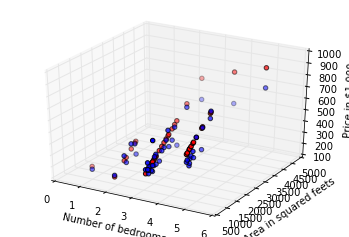

In [341]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Number of bedrooms')
ax.set_ylabel('Area in squared feets')
ax.set_zlabel('Price in $1.000')

ax.scatter(bedrooms , feet2 , price )
ax.scatter(X[: , 2] , X[: , 1] , W[0]*X[: , 0] + W[1]*X[: , 1] + W[2]*X[: , 2] , c = 'r')
plt.show()

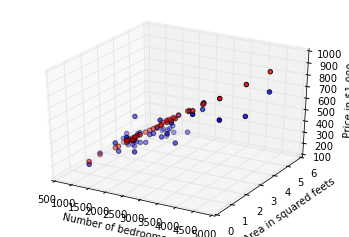

In [342]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Number of bedrooms')
ax.set_ylabel('Area in squared feets')
ax.set_zlabel('Price in $1.000')

ax.scatter(feet2 , bedrooms , price )
ax.scatter(X[: , 1] , X[: , 2] , W[0]*X[: , 0] + W[1]*X[: , 1] + W[2]*X[: , 2] , c = 'r')
plt.show()

In [343]:
Y = np.dot(X , weights)
print (min(t))
print (min(Y))
print (max(t))
print (max(Y))

169.9
141.360332923
699.9
739.812596092
